# Linear Regression
## Rachel Tekchandani
---
### Linear Regression is a supervised learning algorithm that is applied to real valued target functions in order to predict a range of possible outputs for a given input.

### The is unlike the two previous algorithms which were classifcation.  this is a prediction algorithm.

### The algorithm assumes that the targets are close to some linear combination of the features of the input data

### Unlike other machine learning algorithms, linear regression has a closed-form solution.

### Closed form means that there is a equation that solves linear regression.
---
#### Ex1) We can use Linear Regressio to relate teh force for stretching a spring to the distance the spring stretches (Hook's Law)

#### Ex2) We can use Linear Regression to relate the salary of a developer to their age and experience.

### This notebook will start exploring Example 2 with the dataset seen in the next cell

In [2]:
# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

38-element Array{Int64,1}:
 18
 19
 20
 21
 22
 23
 24
 25
 26
 27
 28
 29
 30
  ⋮
 44
 45
 46
 47
 48
 49
 50
 51
 52
 53
 54
 55

In [3]:
# Developer Salary
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

38-element Array{Int64,1}:
  17784
  16500
  18012
  20628
  25206
  30252
  34368
  38496
  42000
  46752
  49320
  53200
  56000
      ⋮
  95000
  90000
  91633
  91660
  98150
  98964
 100000
  98988
 100000
 108923
 105000
 103117

## The goal of linear regression is to solve a system of equations

### $$ y^1 = w_1x^1 + w_2 $$
### $$ y^2 = w_1x^2 + w_2 $$
### $$ y^3 = w_1x^3 + w_2 $$

### The equations can be converted to Matrix notation

### $$ \begin{bmatrix} x^1 & 1 \\ x^2 & 1 \\ x^3 & 1 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} y^1 \\ y^2 \\ y^3 \end{bmatrix} $$
### $$ X \qquad \quad w \quad \qquad   y  $$

### We want to solve for $w$:

### $$ Xw = y $$

### There is no exact solution and so we can find $\hat{w}$ which is an approximation

### $$ X^TX\hat{w} = X^Ty => \hat{w} = (X^T X)^{-1} X^T y $$

### after solving...

### $$ y \approx \hat{w}_1 x^* + \hat{w}_2 $$

In [4]:
# import Plots and Random
using Plots
using Random

In [5]:
data = [x for x in zip(ages_x,dev_y)]

38-element Array{Tuple{Int64,Int64},1}:
 (18, 17784)
 (19, 16500)
 (20, 18012)
 (21, 20628)
 (22, 25206)
 (23, 30252)
 (24, 34368)
 (25, 38496)
 (26, 42000)
 (27, 46752)
 (28, 49320)
 (29, 53200)
 (30, 56000)
 ⋮
 (44, 95000)
 (45, 90000)
 (46, 91633)
 (47, 91660)
 (48, 98150)
 (49, 98964)
 (50, 100000)
 (51, 98988)
 (52, 100000)
 (53, 108923)
 (54, 105000)
 (55, 103117)

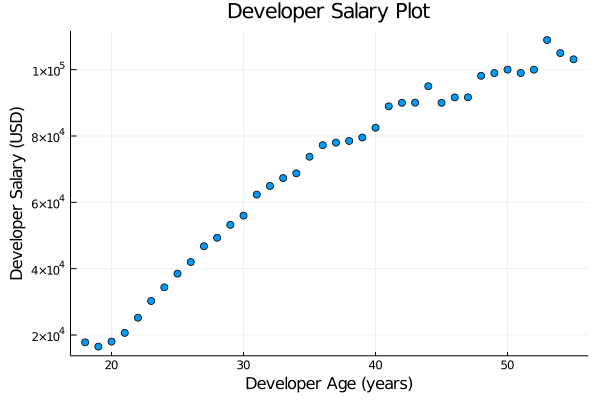

In [6]:
# plot to see if a linear trend can be seen

scatter([p for p in data],
        xaxis = "Developer Age (years)",
        yaxis = "Developer Salary (USD)",
        title = "Developer Salary Plot",
        legend = false)

In [7]:
# create a testing and training set split

# Randomly select data poitns from the full data set to make training set

train_x = randsubseq(ages_x, .5)
train_y = [x[2] for x in data if x[1] in train_x]
train_data = [ x for x in zip(train_x,train_y)]

15-element Array{Tuple{Int64,Int64},1}:
 (19, 16500)
 (20, 18012)
 (24, 34368)
 (26, 42000)
 (27, 46752)
 (29, 53200)
 (35, 73752)
 (36, 77232)
 (38, 78508)
 (41, 88935)
 (42, 90000)
 (44, 95000)
 (45, 90000)
 (53, 108923)
 (55, 103117)

In [8]:
# create the test data which is the data that was not chosen for training
test_data = [x for x in data if x ∉ train_data ]

23-element Array{Tuple{Int64,Int64},1}:
 (18, 17784)
 (21, 20628)
 (22, 25206)
 (23, 30252)
 (25, 38496)
 (28, 49320)
 (30, 56000)
 (31, 62316)
 (32, 64928)
 (33, 67317)
 (34, 68748)
 (37, 78000)
 (39, 79536)
 (40, 82488)
 (43, 90056)
 (46, 91633)
 (47, 91660)
 (48, 98150)
 (49, 98964)
 (50, 100000)
 (51, 98988)
 (52, 100000)
 (54, 105000)

In [9]:
## Test that test and train data adds to the whole data
length(train_data)+length(test_data)==length(data)

true

In [10]:
# first make the matrix X

X = ones(length(train_x), 2)
X[:,1] = train_x
X

15×2 Array{Float64,2}:
 19.0  1.0
 20.0  1.0
 24.0  1.0
 26.0  1.0
 27.0  1.0
 29.0  1.0
 35.0  1.0
 36.0  1.0
 38.0  1.0
 41.0  1.0
 42.0  1.0
 44.0  1.0
 45.0  1.0
 53.0  1.0
 55.0  1.0

In [11]:
# next solve for ŵ
ŵ = (X'*X)\(X'*train_y)

# Note: if Ax = B, then x = A\b solves the system

2-element Array{Float64,1}:
   2622.1290504050417
 -25594.527527752813

In [23]:
# define the regression line, i.e.e the prediction function

prediction(x) = ŵ[1]*x + ŵ[2]

prediction (generic function with 1 method)

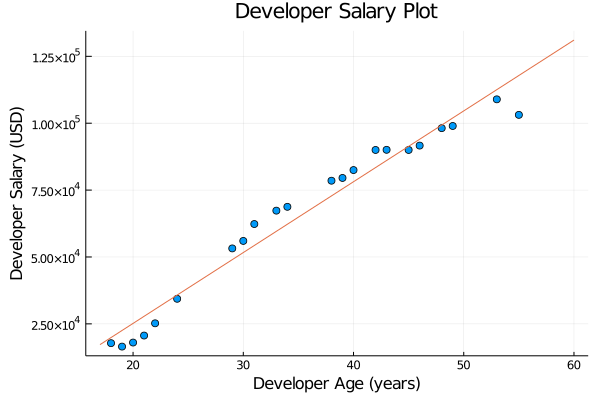

In [29]:
#plot against the training data
scatter([p for p in train_data],
        xaxis = "Developer Age (years)",
        yaxis = "Developer Salary (USD)",
        title = "Developer Salary Plot",
        legend = false)
plot!([(x, prediction(x)) for x = 17:60])

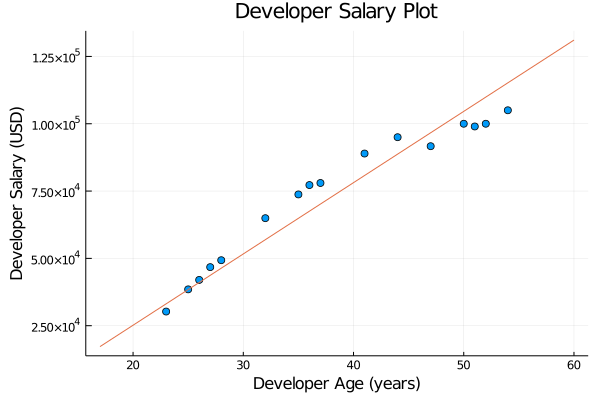

In [30]:
#plot against the training data
scatter([p for p in test_data],
        xaxis = "Developer Age (years)",
        yaxis = "Developer Salary (USD)",
        title = "Developer Salary Plot",
        legend = false)
plot!([(x, prediction(x)) for x = 17:60])

In [31]:
# to test the fit, calculate the error
error_array = [abs(prediction(x[1])-x[2]) for x in train_data] 

22-element Array{Float64,1}:
  2101.2618157089237
  6032.724583474985
  7168.187351241053
  7199.650119007121
  5269.1128867731895
  1402.038422305326
  4192.64773886434
  4345.184971098279
  8013.722203332203
  7719.796667800081
  6503.333900034006
  5673.482828969747
  4054.0200612036715
  4358.5572934376105
  6575.631757905474
  3984.168990139413
  1366.7565453927236
  2381.219313158799
  1159.1448486909358
  2992.6076164569968
  3623.45868752127
 14724.384223053392

In [32]:
# find the maximum of the error array
maximum(error_array)

14724.384223053392

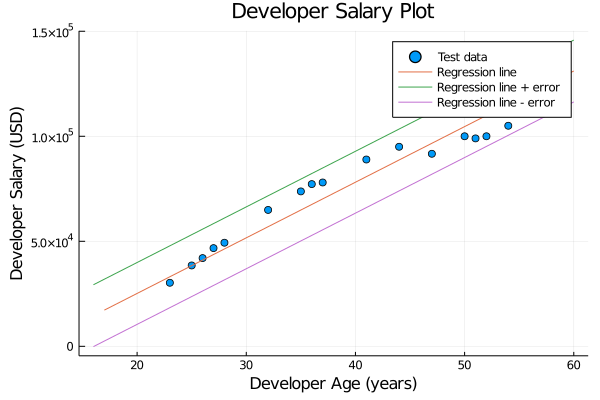

In [38]:
#plot against the training data
scatter([p for p in test_data],
        xaxis = "Developer Age (years)",
        yaxis = "Developer Salary (USD)",
        title = "Developer Salary Plot",
        label = "Test data")

plot!([(x, prediction(x)) for x = 17:60], label = "Regression line")

plot!([(x, prediction(x) + maximum(error_array)) for x = 16:60], label = "Regression line + error")
plot!([(x, prediction(x) - maximum(error_array)) for x = 16:60], label = "Regression line - error")

In [39]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array))

prediction_interval (generic function with 1 method)

In [40]:
prediction_interval(41)

(66052.52125127507, 95501.28969738186)